<a href="https://colab.research.google.com/github/NAVEENPRAKASHKV/17_11_project_1/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
mnist=tf.keras.datasets.mnist

In [77]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [55]:
X_train[500].shape

(28, 28)

<Axes: >

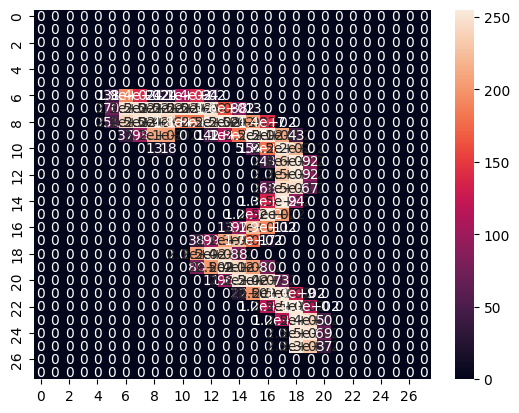

In [56]:
sns.heatmap(X_train[500],annot=True)

In [78]:
# convereting all the pixel in between 0-1 range
X_valid,X_train=X_train[:5000]/255,X_train[5000:]/255
y_valid,y_train=y_train[:5000],y_train[5000:]

In [79]:
y_train.shape

(55000,)

In [59]:
# convereting all the pixel in between 0-1 range
X_test=X_test/255

In [60]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [84]:
model=Sequential()

In [85]:
model.add(Flatten(input_shape=(28,28),name="input_layer"))
model.add(Dense(300,activation="relu",name="hidden_layer_1"))
model.add(Dense(200,activation="relu",name="hidden_layer_2"))
model.add(Dense(10,activation="softmax",name="output_layer"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               60200     
                                                                 
 output_layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297710 (1.14 MB)
Trainable params: 297710 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
#to get the model layer details
model.layers

In [88]:
# to get the name of specific model, that was named during model creation
model.layers[1].name

'hidden_layer_1'

In [89]:
hidden_1=model.layers[1]

In [90]:
weight,bias=hidden_1.get_weights()

In [91]:
weight

array([[-0.04220729,  0.00202669, -0.00561462, ...,  0.01720697,
         0.01101805,  0.02295467],
       [ 0.00205435,  0.03387483, -0.00449662, ..., -0.0606658 ,
        -0.04492161, -0.00160219],
       [-0.05801845,  0.05371049, -0.04200423, ..., -0.0010886 ,
        -0.05141845, -0.069354  ],
       ...,
       [ 0.03067034,  0.04170833, -0.05117133, ...,  0.01713441,
        -0.02539896,  0.06687595],
       [-0.04035302, -0.07359257, -0.07047196, ...,  0.01641119,
        -0.00783306,  0.05018859],
       [ 0.03432642, -0.0739641 ,  0.06825703, ..., -0.06431428,
        -0.01989992,  0.01751661]], dtype=float32)

In [92]:
model_hist=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))  # default batch size is 32

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2081 - accuracy: 0.9371 - val_loss: 0.1069 - val_accuracy: 0.9696
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9737 - val_loss: 0.0807 - val_accuracy: 0.9738
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0605 - accuracy: 0.9806 - val_loss: 0.0782 - val_accuracy: 0.9768
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.0757 - val_accuracy: 0.9790
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0930 - val_accuracy: 0.9778
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0921 - val_accuracy: 0.9792
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0817 - val_accuracy:

In [93]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.208107,0.937073,0.106888,0.9696
1,0.085454,0.973673,0.080707,0.9738
2,0.060475,0.980618,0.078153,0.9768
3,0.043786,0.985836,0.075732,0.9790
4,0.032976,0.989091,0.092953,0.9778
5,0.028514,0.990655,0.092117,0.9792
6,0.024609,0.992036,0.081749,0.9776
7,0.019896,0.993909,0.094322,0.9786
8,0.018135,0.994255,0.093995,0.9798
9,0.017390,0.994091,0.089528,0.9810


In [94]:
import os
import datetime

def save_path(dir_path="/content/save_model"):
  os.makedirs(dir_path,exist_ok=True)
  now = datetime.datetime.now()
  file_name=now.strftime("model_%Y-%m-%d %H:%M:%S")
  path=os.path.join(dir_path,file_name)
  print(path)
  return path

model.save(save_path())


/content/save_model/model_2024-03-31 09:58:43


In [95]:
model_hist.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

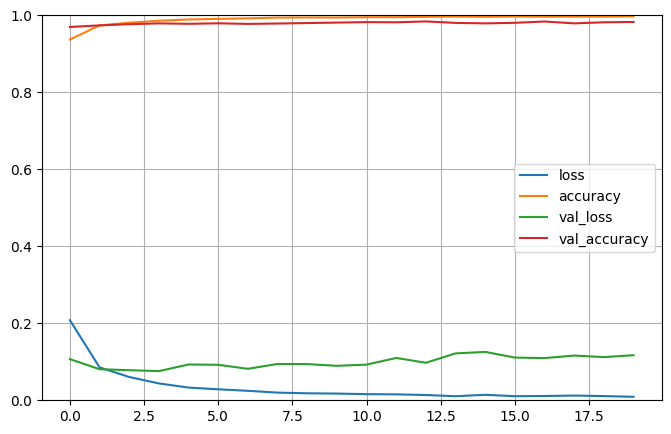

In [99]:
pd.DataFrame(model_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [111]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 30.0511 - accuracy: 0.9817


[30.051069259643555, 0.9817000031471252]

In [114]:
model.evaluate(X_test,y_test)[1]

313/313 [==============================] - 0s 1ms/step - loss: 30.0511 - accuracy: 0.9817


0.9817000031471252

In [101]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


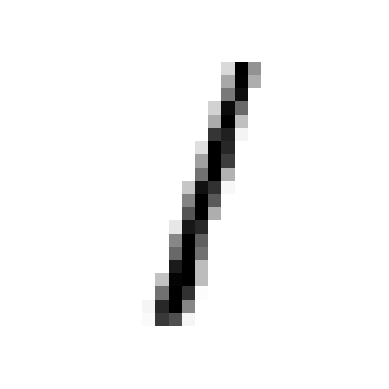

In [110]:
for i in range(0,3):
  plt.imshow(X_test[i],cmap="binary")
  plt.axis("off")
  plt.show

In [116]:
y_pred[5]    # probbility of each numeric

array([0.        , 0.99999994, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [117]:
np.argmax(y_pred[5] )  # tell the index poistion of maximum probability here index poition is as that of numeric because 0=0th index,1=1 st index

1

In [119]:
# already craeted model assign to a varibale
from tensorflow.keras.models import load_model
new_model=load_model("/content/save_model/model_2024-03-31 09:58:43")
